# HARSHA - CH.SC.U4CSE23020

# Scenario 1: Initial Data Inspection and Loading 

In [211]:
import pandas as pd 

# Write the Python code to load dirty_employee_dataset.csv into a Pandas DataFrame. Name your DataFrame df. 

In [212]:
df = pd.read_csv('EmployeeDataset.csv')

# Display the first 5 rows of the DataFrame.  

In [213]:
df.head()

,Employee_ID,Name,Age,Department,Salary,Join_Date,Performance_Score,Manager,Bonus_Eligible,Remarks
0,E0001,NaN,25.0,HR,65000.0,2023-06-30,5.0,NaN,no,NaN
1,E0002,James Chavez,35.0,HR,NaN,2024-02-13,1.0,Richard Mills,yes,Good
2,E0003,Shane Williams,25.0,IT,50000.0,2025-02-04,1.0,Tyler Whitney,NaN,NaN
3,E0004,Mr. Joseph Lewis,30.0,IT,55000.0,2023-10-31,5.0,Nicole Cardenas,N,NaN
4,E0005,Dr. Eric Weiss,NaN,HR,60000.0,2021-12-12,4.0,Ronald Lucero,yes,NaN


# Display the last 3 rows of the DataFrame. 

In [214]:
df.tail(3)

,Employee_ID,Name,Age,Department,Salary,Join_Date,Performance_Score,Manager,Bonus_Eligible,Remarks
98,E0099,Vanessa Clark,25.0,NaN,65000.0,2023-07-01,5.0,Marie Velez,yes,NaN
99,E0100,Craig Blair,NaN,IT,65000.0,2020-10-13,3.0,Dr. Andrew Thomas,NaN,NaN
100,E0006,Nichole Montgomery,35.0,NaN,NaN,2022-05-28,NaN,Blake Moore,N,NaN


# Show the column names and their data types. 

In [215]:
df.dtypes

Employee_ID           object
Name                  object
Age                  float64
Department            object
Salary               float64
Join_Date             object
Performance_Score    float64
Manager               object
Bonus_Eligible        object
Remarks               object
dtype: object

# Get a summary of non-null values and memory usage. 

In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Employee_ID        101 non-null    object 
 1   Name               91 non-null     object 
 2   Age                69 non-null     float64
 3   Department         77 non-null     object 
 4   Salary             75 non-null     float64
 5   Join_Date          101 non-null    object 
 6   Performance_Score  81 non-null     float64
 7   Manager            88 non-null     object 
 8   Bonus_Eligible     88 non-null     object 
 9   Remarks            46 non-null     object 
dtypes: float64(3), object(7)
memory usage: 8.0+ KB


# Based on your initial inspection (head, tail, info), what are some immediate concerns 
# or potential issues you notice in the dataset that might need cleaning?

# How many rows and columns does the dataset have? 

In [217]:
print('Rows and columns : ',df.shape)

Rows and columns :  (101, 10)


# Scenario 2: Handling Missing Values 
# 1. Identify Missing Values

# Calculate the total number of missing values in each column. 

In [218]:
df.isnull().sum()

Employee_ID           0
Name                 10
Age                  32
Department           24
Salary               26
Join_Date             0
Performance_Score    20
Manager              13
Bonus_Eligible       13
Remarks              55
dtype: int64

# Calculate the percentage of missing values for each column. 

# Which columns have missing values, and what is the extent of missingness? 

# 2. Strategize Imputation/Deletion

# For columns with missing values, consider their nature and propose a strategy for handling them (e.g., dropping rows/columns, imputing with mean/median/mode, or a specific value). Justify your choice for each column. 

# 3.Implement Strategy

# Apply your chosen strategy to handle missing values in the df. 

In [219]:
df_cleaned = df.drop(columns=['Remarks'])
df_cleaned['Age'] = df_cleaned['Age'].fillna(df_cleaned['Age'].median())
df_cleaned['Salary'] = df_cleaned['Salary'].fillna(df_cleaned['Salary'].median())
df_cleaned['Department'] = df_cleaned['Department'].fillna(df_cleaned['Department'].mode()[0])
df_cleaned['Performance_Score'] = df_cleaned['Performance_Score'].fillna(df_cleaned['Performance_Score'].mode()[0])
df_cleaned['Manager'] = df_cleaned['Manager'].fillna(df_cleaned['Manager'].mode()[0])
df_cleaned['Bonus_Eligible'] = df_cleaned['Bonus_Eligible'].astype(str).str.strip().str.lower().replace({
    'yes': 'Yes', 'y': 'Yes',
    'no': 'No', 'n': 'No',
    'nan': pd.NA
})
df_cleaned['Bonus_Eligible'] = df_cleaned['Bonus_Eligible'].fillna(df_cleaned['Bonus_Eligible'].mode()[0])
df_cleaned['Name'] = df_cleaned['Name'].fillna('Unknown').astype(str)
df_cleaned

,Employee_ID,Name,Age,Department,Salary,Join_Date,Performance_Score,Manager,Bonus_Eligible
0,E0001,Unknown,25.0,HR,65000.0,2023-06-30,5.0,Blake Moore,No
1,E0002,James Chavez,35.0,HR,55000.0,2024-02-13,1.0,Richard Mills,Yes
2,E0003,Shane Williams,25.0,IT,50000.0,2025-02-04,1.0,Tyler Whitney,Yes
3,E0004,Mr. Joseph Lewis,30.0,IT,55000.0,2023-10-31,5.0,Nicole Cardenas,No
4,E0005,Dr. Eric Weiss,30.0,HR,60000.0,2021-12-12,4.0,Ronald Lucero,Yes
...,...,...,...,...,...,...,...,...,...
96,E0097,Joseph Lopez PhD,35.0,IT,55000.0,2022-01-07,2.0,Blake Moore,Yes
97,E0098,Jason Yang,30.0,HR,55000.0,2021-08-29,3.0,Cheryl Oconnor,No
98,E0099,Vanessa Clark,25.0,IT,65000.0,2023-07-01,5.0,Marie Velez,Yes
99,E0100,Craig Blair,30.0,IT,65000.0,2020-10-13,3.0,Dr. Andrew Thomas,Yes


# Verify that there are no remaining missing values after your operations (or only where you decided to keep them). 

In [220]:
df_cleaned.isnull().sum()

Employee_ID          0
Name                 0
Age                  0
Department           0
Salary               0
Join_Date            0
Performance_Score    0
Manager              0
Bonus_Eligible       0
dtype: int64

# Scenario 3: Data Type Conversion and Consistency 

# 1. Check Data Types: 

# Re-examine the data types of all columns using df.info(). 

In [221]:
df.dtypes

Employee_ID           object
Name                  object
Age                  float64
Department            object
Salary               float64
Join_Date             object
Performance_Score    float64
Manager               object
Bonus_Eligible        object
Remarks               object
dtype: object

In [222]:
df_cleaned.dtypes

Employee_ID           object
Name                  object
Age                  float64
Department            object
Salary               float64
Join_Date             object
Performance_Score    float64
Manager               object
Bonus_Eligible        object
dtype: object

In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Employee_ID        101 non-null    object 
 1   Name               91 non-null     object 
 2   Age                69 non-null     float64
 3   Department         77 non-null     object 
 4   Salary             75 non-null     float64
 5   Join_Date          101 non-null    object 
 6   Performance_Score  81 non-null     float64
 7   Manager            88 non-null     object 
 8   Bonus_Eligible     88 non-null     object 
 9   Remarks            46 non-null     object 
dtypes: float64(3), object(7)
memory usage: 8.0+ KB


In [224]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Employee_ID        101 non-null    object 
 1   Name               101 non-null    object 
 2   Age                101 non-null    float64
 3   Department         101 non-null    object 
 4   Salary             101 non-null    float64
 5   Join_Date          101 non-null    object 
 6   Performance_Score  101 non-null    float64
 7   Manager            101 non-null    object 
 8   Bonus_Eligible     101 non-null    object 
dtypes: float64(3), object(6)
memory usage: 7.2+ KB


# Are there any columns that are currently of type object but should be numerical or datetime? Identify them. 

Yes, the join_date column is currently of type object but should be converted to datetime for accurate time-based analysis.

# 2. Clean Numeric Columns: 
# Assume 'Salary' and 'Years_Experience' should be numeric. Identify any non-numeric characters or inconsistencies (e.g., currency symbols, commas, spaces) that might prevent direct conversion. 

In [225]:
print(df_cleaned['Salary'].unique())

[65000. 55000. 50000. 60000.]


# Write code to clean these columns (remove non-numeric characters) and convert them to an appropriate numeric data type (e.g., float or int). Handle any conversion errors gracefully. 

No such conversion is required. Only empty salary columns are found and they are handled above. 

# 3. Clean String Columns

# Examine string-based columns like 'Department', 'Gender', and 'Job_Role'. Are there any leading/trailing spaces or inconsistent casing (e.g., "HR" vs "hr", "Marketing " vs "Marketing")? 

# Standardize the string columns by stripping whitespace and converting text to a consistent case (e.g., title case or capitalize first letter). 

In [226]:
# To ensure these columns are not inconsistent 
df_cleaned['Name'] = df_cleaned['Name'].str.strip().str.title()
df_cleaned['Department'] = df_cleaned['Department'].str.strip().str.capitalize()
df_cleaned['Manager'] = df_cleaned['Manager'].str.strip().str.title()

df_cleaned

,Employee_ID,Name,Age,Department,Salary,Join_Date,Performance_Score,Manager,Bonus_Eligible
0,E0001,Unknown,25.0,Hr,65000.0,2023-06-30,5.0,Blake Moore,No
1,E0002,James Chavez,35.0,Hr,55000.0,2024-02-13,1.0,Richard Mills,Yes
2,E0003,Shane Williams,25.0,It,50000.0,2025-02-04,1.0,Tyler Whitney,Yes
3,E0004,Mr. Joseph Lewis,30.0,It,55000.0,2023-10-31,5.0,Nicole Cardenas,No
4,E0005,Dr. Eric Weiss,30.0,Hr,60000.0,2021-12-12,4.0,Ronald Lucero,Yes
...,...,...,...,...,...,...,...,...,...
96,E0097,Joseph Lopez Phd,35.0,It,55000.0,2022-01-07,2.0,Blake Moore,Yes
97,E0098,Jason Yang,30.0,Hr,55000.0,2021-08-29,3.0,Cheryl Oconnor,No
98,E0099,Vanessa Clark,25.0,It,65000.0,2023-07-01,5.0,Marie Velez,Yes
99,E0100,Craig Blair,30.0,It,65000.0,2020-10-13,3.0,Dr. Andrew Thomas,Yes


In [227]:
print(df_cleaned['Name'].unique())
print(df_cleaned['Department'].unique())
print(df_cleaned['Manager'].unique())

['Unknown' 'James Chavez' 'Shane Williams' 'Mr. Joseph Lewis'
 'Dr. Eric Weiss' 'Nichole Montgomery' 'Emily Foley' 'Bailey Howard Md'
 'Nicholas Watkins' 'Christopher Lucas' 'Juan Kennedy' 'Michael Zavala'
 'Derek Fuller' 'Edward Rogers' 'Phillip Martin' 'Linda Spencer'
 'Candace Walton' 'Kenneth Miller' 'Heather Walters' 'John Lee'
 'Brent Higgins' 'Victor Knight' 'Marcus Wheeler' 'Joseph Hunt'
 'Sara Bolton' 'Ethan Shields' 'Tamara Pena' 'Nicole Ray'
 'Nicolas Williams' 'Susan Cole' 'Kelly Shannon' 'Isabel Riley'
 'Nicole Pierce' 'Suzanne Frank' 'Dustin Morrison' 'Kyle May'
 'Carol Brown' 'Gavin Ross' 'Sharon Reed' 'Jorge Best' 'Elizabeth Martin'
 'Madeline Huynh' 'Ariel Mcintyre' 'Charles Perkins' 'Ryan Moss'
 'Jeffrey Ellis' 'Jennifer Green' 'Rhonda Jackson' 'Kevin Christensen'
 'Stephanie Bond' 'Jade Nash' 'William Newton' 'Tara Garcia'
 'Jeremiah Malone' 'Michael Cooper' 'Heather Morse' 'Patrick Waller'
 'Carrie Ramirez' 'Denise Ashley' 'Ashley Ball' 'Ronald Baker'
 'Omar Hoffman

# Date Column

# If there's a 'Date' or 'Hire_Date' column (check the actual dataset), identify its current data type. 

In [228]:
print(df_cleaned.dtypes[['Join_Date']])

Join_Date    object
dtype: object


# Convert it to a proper datetime object. 

In [229]:
df_cleaned['Join_Date'] = pd.to_datetime(df_cleaned['Join_Date'], errors='coerce')
print(df_cleaned['Join_Date'])

0     2023-06-30
1     2024-02-13
2     2025-02-04
3     2023-10-31
4     2021-12-12
         ...    
96    2022-01-07
97    2021-08-29
98    2023-07-01
99    2020-10-13
100   2022-05-28
Name: Join_Date, Length: 101, dtype: datetime64[ns]


# Scenario 4: Handling Duplicates and Outliers 

# 1. Identify Duplicates

# Check for completely duplicate rows in the DataFrame. How many are there? 

In [230]:
duplicate_rows = df_cleaned.duplicated()
print("Number of completely duplicate rows:", duplicate_rows.sum())

Number of completely duplicate rows: 1


# Consider specific columns that might indicate a unique employee (e.g., 'Employee_ID' if it exists, or a combination like 'Name' and 'Hire_Date'). Check for duplicates based on these key columns. 

In [231]:
duplicate_ids = df_cleaned.duplicated(subset=['Employee_ID'])
print("Duplicate rows based on Employee_ID:", duplicate_ids.sum())

Duplicate rows based on Employee_ID: 1


In [232]:
duplicate_keys = df_cleaned.duplicated(subset=['Name', 'Join_Date'])
print("Duplicate rows based on Name and Join_Date:", duplicate_keys.sum())

Duplicate rows based on Name and Join_Date: 1


# 2. Remove Duplicates

# Remove any identified duplicate rows from the DataFrame. Decide whether to keep the first or last occurrence, and explain why you chose that. 

In [233]:
df_cleaned = df_cleaned.drop_duplicates(keep='first')

Keeping the first occurrence is the default and safest choice, as it typically represents the original, intended entry. Later duplicates are often redundant or accidentally introduced during data processing.

# Verify that duplicates have been removed. 

In [234]:
print("Remaining duplicate rows:", df_cleaned.duplicated().sum())

Remaining duplicate rows: 0


# 3. Basic Outlier Identification

# For a key numerical column like 'Salary' or 'Years_Experience', calculate its basic descriptive statistics (min, max, mean, std, quartiles). 

In [235]:
print("Salary Statistics:\n", df_cleaned['Salary'].describe())

Salary Statistics:
 count      100.000000
mean     56450.000000
std       4782.913613
min      50000.000000
25%      55000.000000
50%      55000.000000
75%      60000.000000
max      65000.000000
Name: Salary, dtype: float64


# Based on these statistics, are there any values that appear to be unusually high or low and might be considered outliers?

In [236]:
salarystats = df_cleaned['Salary'].describe()
q1=salarystats["25%"]
q3=salarystats["75%"]
iqr=q3-q1
lower=q1-1.5*iqr
upper=q3+1.5*iqr
print('High: ',lower)
print('Low: ',upper)
outliers=df[(df['Salary']<lower)|(df['Salary']>upper)]
print(outliers['Employee_ID'])
print('No of outliers: ',len(outliers))

High:  47500.0
Low:  67500.0
Series([], Name: Employee_ID, dtype: object)
No of outliers:  0


# Scenario 5: Exploratory Data Analysis (EDA) - Series & DataFrame Operations 

# 1. Descriptive Statistics

# Generate descriptive statistics for all numerical columns. What do these statistics tell you about the distribution and central tendency of Salary and Years_Experience? 

In [237]:
print(df_cleaned.describe())

              Age        Salary            Join_Date  Performance_Score
count  100.000000    100.000000                  100          100.00000
mean    29.750000  56450.000000  2023-03-06 06:28:48            2.83000
min     25.000000  50000.000000  2020-07-22 00:00:00            1.00000
25%     25.000000  55000.000000  2021-11-04 18:00:00            2.00000
50%     30.000000  55000.000000  2023-05-18 12:00:00            2.00000
75%     30.000000  60000.000000  2024-05-29 06:00:00            4.00000
max     35.000000  65000.000000  2025-06-05 00:00:00            5.00000
std      3.435921   4782.913613                  NaN            1.29533


# 2. Value Counts 

# Use .value_counts() on the 'Department' column. Which departments have the most employees? 

In [238]:
print(df_cleaned['Department'].value_counts())
common = df_cleaned['Department'].value_counts().idxmax()
print("Department with the most employees:", common)

Department
It         47
Finance    23
Sales      16
Hr         14
Name: count, dtype: int64
Department with the most employees: It


# Do the same for 'Gender' and 'Job_Role'. What insights can you derive? 

No such columns in dataset

In [239]:
print(df_cleaned['Bonus_Eligible'].value_counts())

Bonus_Eligible
Yes    58
No     42
Name: count, dtype: int64


In [240]:
print(df_cleaned['Manager'].value_counts())

Manager
Blake Moore          14
Richard Mills         1
Tyler Whitney         1
Nicole Cardenas       1
Ronald Lucero         1
                     ..
Dylan Andrews         1
Diana Spears          1
Cheryl Oconnor        1
Marie Velez           1
Dr. Andrew Thomas     1
Name: count, Length: 87, dtype: int64


# Filtering and Subsetting (DataFrame)

# Create a new DataFrame containing only employees from the 'Sales' department. How many sales employees are there? 

In [241]:
sales_df = df_cleaned[df_cleaned['Department'] == 'Sales']
print(sales_df)
print("Number of Sales employees:", len(sales_df))

   Employee_ID              Name   Age Department   Salary  Join_Date  \
7        E0008  Bailey Howard Md  30.0      Sales  65000.0 2022-10-13   
12       E0013    Michael Zavala  30.0      Sales  55000.0 2021-07-07   
18       E0019    Kenneth Miller  35.0      Sales  55000.0 2023-08-09   
26       E0027       Sara Bolton  30.0      Sales  50000.0 2022-07-15   
32       E0033        Susan Cole  30.0      Sales  55000.0 2021-11-22   
33       E0034     Kelly Shannon  25.0      Sales  55000.0 2020-12-27   
34       E0035      Isabel Riley  30.0      Sales  55000.0 2024-08-11   
35       E0036     Nicole Pierce  25.0      Sales  55000.0 2023-02-25   
41       E0042        Gavin Ross  35.0      Sales  55000.0 2024-04-11   
46       E0047    Ariel Mcintyre  30.0      Sales  50000.0 2025-04-16   
52       E0053    Rhonda Jackson  30.0      Sales  65000.0 2024-08-09   
54       E0055    Stephanie Bond  30.0      Sales  50000.0 2020-11-03   
58       E0059   Jeremiah Malone  30.0      Sales  

# Find all employees with 'Years_Experience' greater than 10. 

In [242]:
from pandas import Timestamp

In [243]:
df_cleaned = df_cleaned.copy()
df_cleaned['Years_Experience'] = (Timestamp.now() - df_cleaned['Join_Date']).dt.days / 365
experienced_employees = df_cleaned[df_cleaned['Years_Experience'] > 10]
print("\nTotal number of such employees with more than 10 years experience:", len(experienced_employees))


Total number of such employees with more than 10 years experience: 0


# Select employees who are female (Gender='Female') and work in the 'HR' department. 

No gender column availabe

# 4. Aggregation 

# Calculate the average 'Salary' for each 'Department'. Which department has the highest average salary? 

In [244]:
avg_salary_by_dept = df.groupby('Department')['Salary'].mean().sort_values(ascending=False)
print("Average Salary by Department:\n")
print(avg_salary_by_dept)
highest_paid_dept = avg_salary_by_dept.idxmax()
highest_avg_salary = avg_salary_by_dept.max()
print(f"\nDepartment with the highest average salary: {highest_paid_dept} (${highest_avg_salary:.2f})")

Average Salary by Department:

Department
Finance    57647.058824
HR         57272.727273
IT         56578.947368
Sales      55000.000000
Name: Salary, dtype: float64

Department with the highest average salary: Finance ($57647.06)


# Calculate the median 'Years_Experience' per 'Job_Role'. 

In [245]:
median_exp = df_cleaned.groupby('Department')['Years_Experience'].median().sort_values(ascending=False)
print("Median Years of Experience by Department:\n")
print(median_exp)

Median Years of Experience by Department:

Department
Finance    3.372603
Sales      2.201370
It         2.049315
Hr         1.280822
Name: Years_Experience, dtype: float64


# Determine the total number of male and female employees. 

No gender column provided

# 5. Grouping and Summarizing

# Group the DataFrame by 'Department' and 'Gender'. Calculate the average 'Salary' for each gender within each department. What interesting patterns do you observe? 

No gender column provided

# 6. Creating New Features

# If the dataset had a 'Hire_Date' and current date, you could create a 'Tenure' column. Since it doesn't, consider creating a 'Salary_Per_Year_Experience' column. What does this new column represent, and what does its average value tell you? 

In [246]:
df_cleaned['Salary_per_yearexp'] = df_cleaned['Salary'] / df_cleaned['Years_Experience'].replace(0, 1)
display(df_cleaned[['Name', 'Salary', 'Years_Experience', 'Salary_per_yearexp']])
print("\nAverage Salary per Year of Experience: ",df_cleaned['Salary_per_yearexp'].mean())

,Name,Salary,Years_Experience,Salary_per_yearexp
0,Unknown,65000.0,2.084932,31176.084100
1,James Chavez,55000.0,1.460274,37664.165103
2,Shane Williams,50000.0,0.482192,103693.181818
3,Mr. Joseph Lewis,55000.0,1.747945,31465.517241
4,Dr. Eric Weiss,60000.0,3.632877,16515.837104
...,...,...,...,...
95,Sharon Crawford,55000.0,0.150685,365000.000000
96,Joseph Lopez Phd,55000.0,3.561644,15442.307692
97,Jason Yang,55000.0,3.920548,14028.651293
98,Vanessa Clark,65000.0,2.082192,31217.105263



Average Salary per Year of Experience:  55174.30479065408


# Scenario 6: Data Visualization Insights 

# 1. Department Distribution

# What type of plot would be best to visualize the distribution of employees across different 'Department's? What would it show? 

A bar plot is ideal for visualizing categorical data like departments, as it shows employee counts clearly. It helps quickly compare which departments have more or fewer employees.

In [247]:
import matplotlib.pyplot as plt

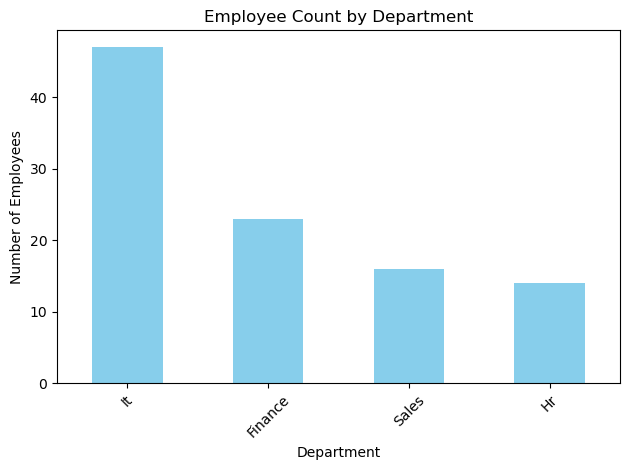

In [248]:
df_cleaned['Department'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Employee Count by Department')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Salary Distribution

# How would you visualize the distribution of 'Salary'? What insights might a histogram or box plot provide? 

To visualize the distribution of Salary, a histogram or a box plot would be most effective. A histogram helps show how salaries are spread across different ranges, revealing patterns such as clustering or skewness in the data. On the other hand, a box plot provides a summary of salary distribution through the median, quartiles, and potential outliers, making it easy to spot unusually high or low salaries. Together, these plots offer insights into the overall salary structure, variability, and fairness within the organization.

NameError: name 'sns' is not defined

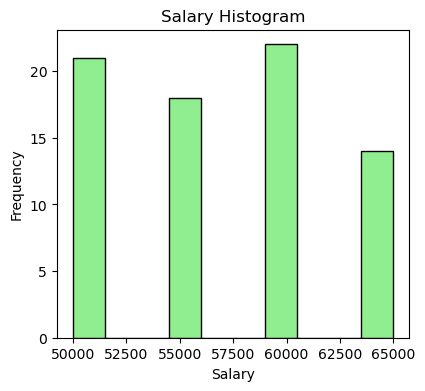

<Figure size 600x400 with 0 Axes>

In [250]:
plt.figure(figsize=(10, 4))

# Histogram
plt.subplot(1, 2, 1)
df['Salary'].dropna().plot(kind='hist', bins=10, color='lightgreen', edgecolor='black')
plt.title('Salary Histogram')
plt.xlabel('Salary')
plt.ylabel('Frequency')

# Box Plot
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Department', y='Salary')
plt.title('Salary Distribution by Department')
plt.show()

plt.tight_layout()
plt.show()

# 3. Salary vs. Experience

# What kind of plot would you use to explore the relationship between 'Salary' and 'Years_Experience'? What would you expect to see? 

To explore the relationship between Salary and Years_Experience, a scatter plot is ideal. It displays individual data points, helping visualize patterns or trends. You’d expect to see a positive correlation, where salary tends to increase with more experience, though there may be some outliers or plateaus at certain levels.

# 4. Gender vs. Department

# How could you visualize the proportion of genders within each department? 

No gender column provided